In [1]:
import os
import sys
import cv2
import numpy as np
from tqdm import tqdm

import NeuralNet_DEEP 
import importlib

# Reload module if there's any changes to NeuralNet
importlib.reload(NeuralNet_DEEP)

os.chdir(sys.path[0])
REBUILD_DATA = True 

class PalmFist():

    IMG_SIZE = NeuralNet_DEEP.IMG_WIDTH
    training_data = []

    # ========================= CLASSES =========================
    AMT_OF_CLASS = NeuralNet_DEEP.CLASSES_COUNT
    
    PALM = "./handCapture/openPalm"
    FIST = "./handCapture/fist"
    LEFT = "./handCapture/left"
    RIGHT = "./handCapture/right"
    THUMB = "./handCapture/thumbsUp"
    #OK = "./handCapture/ok"
    PEACE = "./handCapture/peace"

    LABELS = {  
        PALM:0, FIST:1, PEACE:2, RIGHT:3, LEFT:4, THUMB:5
    }
    
    
    palmCount = 0
    fistCount = 0 
    leftCount = 0 
    rightCount = 0 
    thumbCount = 0 
    #okCount = 0 
    peaceCount = 0 

    # ========================= CLASSES =========================

    # Convolution network can be passed flat data, or 2 dimensional, 3 dimensional, .. 8
    def make_training_data(self):
        for label in self.LABELS:

            for f in tqdm(os.listdir(label)):
                try:
                    # f will just be file name
                    path = os.path.join(label, f)

                    # ask yourself does colour matters in the picture? If not then gray scale. Because
                    # you always want to simplify the nueral network at every opportunity. Make data smaller as well
                    # img = cv2.imread(path)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

                    # Use one hot vectors. Like cats = 0, dogs = 1
                    # if data [cats, dogs], the result will be [0,1] | data [cats, cats], the result will be [0,0]
                    # what index is hot so to speak. Use np.eye() to create diagonal 1 by matrix
                    
                    # self.training_data.append([np.array(img), np.eye(7)[self.LABELS[label]]])
                    self.training_data.append([np.array(img), np.eye(self.AMT_OF_CLASS)[self.LABELS[label]]])

                    if label == self.PALM:
                        self.palmCount += 1
                    elif label == self.FIST:
                        self.fistCount += 1
                    elif label == self.LEFT:    
                        self.leftCount += 1
                    elif label == self.RIGHT:
                        self.rightCount += 1
                    elif label == self.THUMB:
                        self.thumbCount += 1
                    #elif label == self.OK:
                        #self.okCount += 1
                    elif label == self.PEACE:
                        self.peaceCount += 1
                except Exception as e:
                    print(e)
                    # some images may be no good as resizing or loading in may have a problem
                    # like their empty or their corrupted
                    continue
        
        # shuffles the data for general practice and balancing
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Palm:", self.palmCount)
        print("Fist:", self.fistCount)
        print("Left:", self.leftCount)
        print("Right:", self.rightCount)
        print("Thumb:", self.thumbCount)
        #print("Ok:", self.okCount)
        print("Peace:", self.peaceCount)

if REBUILD_DATA:
    trainer = PalmFist()
    print("IMG SIZE:", trainer.IMG_SIZE)

    trainer.make_training_data()

IMG SIZE: 140


100%|██████████| 2000/2000 [00:02<00:00, 696.29it/s]
D:\Python\lib\site-packages\numpy\lib\npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Palm: 2000
Fist: 2000
Left: 2000
Right: 2000
Thumb: 2000
Peace: 2000


In [2]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [3]:
print(len(training_data))

12000


In [4]:
NUM = 600

print(training_data[NUM])

[array([[120, 129, 134, ..., 188, 167, 144],
        [ 99, 112, 128, ..., 179, 160, 140],
        [ 65,  65,  88, ..., 172, 165, 151],
        ...,
        [ 87,  87,  87, ..., 126, 128, 128],
        [ 87,  88,  86, ..., 125, 125, 126],
        [ 89,  87,  86, ..., 125, 125, 124]], dtype=uint8)
 array([0., 0., 0., 0., 1., 0.])]


[[120 129 134 ... 188 167 144]
 [ 99 112 128 ... 179 160 140]
 [ 65  65  88 ... 172 165 151]
 ...
 [ 87  87  87 ... 126 128 128]
 [ 87  88  86 ... 125 125 126]
 [ 89  87  86 ... 125 125 124]]


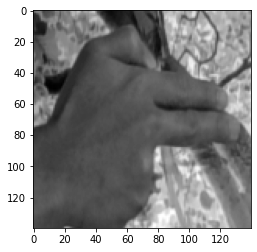

[0. 0. 0. 0. 1. 0.]


In [5]:
import matplotlib.pyplot as plt

print(training_data[NUM][0])


plt.imshow(training_data[NUM][0], cmap="gray")
plt.show()
print(training_data[NUM][1])